# Load and minibatch MNIST data
(c) Deniz Yuret, 2019
* Objective: Load the [MNIST](http://yann.lecun.com/exdb/mnist) dataset, convert into Julia arrays, split into minibatches using Knet's [minibatch](http://denizyuret.github.io/Knet.jl/latest/reference/#Knet.minibatch) function and  [Data](https://github.com/denizyuret/Knet.jl/blob/master/src/data.jl) iterator type.
* Prerequisites: [Julia arrays](https://docs.julialang.org/en/v1/manual/arrays)
* New functions: [dir](http://denizyuret.github.io/Knet.jl/latest/reference/#Knet.dir), [minibatch, Data](http://denizyuret.github.io/Knet.jl/latest/reference/#Knet.minibatch), [mnist, mnistview](https://github.com/denizyuret/Knet.jl/blob/master/data/mnist.jl)

In the next few notebooks, we build classification models for the MNIST handwritten digit recognition dataset. MNIST has 60000 training and 10000 test examples. Each input x consists of 784 pixels representing a 28x28 image. The corresponding output indicates the identity of the digit 0..9.

![](http://yann.lecun.com/exdb/lenet/gifs/asamples.gif "MNIST")

[image source](http://yann.lecun.com/exdb/lenet)

In [1]:
# Load packages, import symbols
using Pkg; for p in ("Knet","Images","ImageMagick"); haskey(Pkg.installed(),p) || Pkg.add(p); end
using Knet: Knet, dir, minibatch, Data

In [2]:
# This loads the MNIST handwritten digit recognition dataset:
include(Knet.dir("data","mnist.jl")) # Knet.dir constructs a path relative to Knet root
xtrn,ytrn,xtst,ytst = mnist()        # mnist() loads MNIST data and converts into Julia arrays
println.(summary.((xtrn,ytrn,xtst,ytst)));

┌ Info: Loading MNIST...
└ @ Main /home/gridsan/dyuret/.julia/dev/Knet/data/mnist.jl:33


28×28×1×60000 Array{Float32,4}
60000-element Array{UInt8,1}
28×28×1×10000 Array{Float32,4}
10000-element Array{UInt8,1}


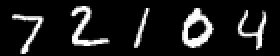

In [3]:
# mnistview(x,i) converts the i'th instance in x into an image
# Here is the first five images from the test set:
using Images
hcat([mnistview(xtst,i) for i=1:5]...)

In [4]:
# Here are their labels (10 is used to represent 0)
println(Int.(ytst[1:5]));

[7, 2, 1, 10, 4]


In [5]:
# `minibatch` splits the data tensors to small chunks called minibatches.
# It returns a Knet.Data struct: an iterator of (x,y) pairs.
dtrn = minibatch(xtrn,ytrn,100)
dtst = minibatch(xtst,ytst,100)

Data{Tuple{Array{Float32,4},Array{UInt8,1}}}(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], UInt8[0x07 0x02 … 0x05 0x06], 100, 10000, false, 9901, 1:10000, false, (28, 28, 1, 10000), (10000,), Array{Float32,4}, Array{UInt8,1})

In [6]:
# Each minibatch is an (x,y) pair where x is 100 (28x28x1) images and y are the corresponding 100 labels.
# Here is the first minibatch in the test set:
(x,y) = first(dtst)
println.(summary.((x,y)));

28×28×1×100 Array{Float32,4}
100-element Array{UInt8,1}


In [7]:
# Iterators can be used in for loops, e.g. `for (x,y) in dtrn`
# dtrn generates 600 minibatches of 100 images (total 60000)
# dtst generates 100 minibatches of 100 images (total 10000)
n = 0
for (x,y) in dtrn
    n += 1
end
n

600